###**Exploratory Data Analysis & Data Cleaning on Youtube Trending vidoes**

##Description
YouTube maintains a list of the top trending videos on the platform. This data set includes several months of data on daily trending YouTube videos.This list is determined by using user interactions such as views, comments and likes to identify which videos are user preferred and displays them on the trending page. Ranking of these videos is done based on a ratio of views, likes, comments and shares, in order to display the best videos at the top of the page
##Dataset 
https://www.kaggle.com/datasets/datasnaek/youtube-new 

##Attribute Info:
No of Data Points :37352

No of Attributes:  16
#### Atribute Table
| Attribute Name | Data Type |
|---------|:-------------|
|video_id         |object|
|trending_date     |object|
|title             |object|
|channel_title     |object
|category_id       |int64 
|publish_time            |object
|tags                    |object
|views                   |int64 
 |likes                   |int64 
 |dislikes                |int64 
 |comment_count           |int64 
 |thumbnail_link          |object
 |comments_disabled       |bool  
 |ratings_disabled        |bool  
 |video_error_or_removed  |bool  
 |description             |object

**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive"

Mounted at /content/drive
/content/drive/MyDrive


**Import Libraries**

In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

Loading dataset & reading it

In [3]:
df=pd.read_csv("INvideos.csv")

In [4]:
#Checking some Random sample of data
df.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
33625,s8j0fAj5J3E,18.25.05,Durga | Full Ep 1078 | 23rd May 2017 | Odia Se...,Tarang TV,24,2018-05-24T05:15:00.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",92567,312,74,42,https://i.ytimg.com/vi/s8j0fAj5J3E/default.jpg,False,False,False,Durga: Story of a revengeful daughter who ente...
7794,CwGDcA68yLU,17.24.12,"Sembarathi - Episode 49 - December 22, 2017 - ...",zeetamil,24,2017-12-22T23:30:52.000Z,"zee Tamil|""Sembarathi""|""full episode""|""Tamil""|...",93647,283,39,17,https://i.ytimg.com/vi/CwGDcA68yLU/default.jpg,False,False,False,http://www.ozee.com/shows/sembarathi - Click h...
12722,WvRPOjsOGmo,18.22.01,Mahasangam - Ama Ghara Laxmi & Ranee | Full Ep...,Tarang TV,24,2018-01-20T15:50:57.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",88951,364,70,42,https://i.ytimg.com/vi/WvRPOjsOGmo/default.jpg,False,False,False,NaN
17119,CA88xbOW1Ow,18.15.02,The Visa Interview | VIVA,VIVA,23,2018-02-09T07:08:03.000Z,"viva|""visa interview""|""viva videos""|""telugu co...",2054420,43851,1980,2410,https://i.ytimg.com/vi/CA88xbOW1Ow/default.jpg,False,False,False,Most of our generation is always ready to fly ...
2992,mE9Nzf2Dl1o,17.29.11,PodhuNalanKarudhi Official Teaser | Zion | Kar...,Black Sheep,1,2017-11-27T10:48:35.000Z,"tamilteaser|""teaser""|""blacksheep""|""Maduraianbu...",83847,2405,101,77,https://i.ytimg.com/vi/mE9Nzf2Dl1o/default.jpg,False,False,False,Podhunalankarudhi upcoming tamil action movie....


In [5]:
#Checking Info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

Now Above we can see that Most column have Obj data type that we need to convert to appropriate data type.

In [6]:
  df['video_id'] = df['video_id'].astype('str') 
    # trending date
  df['trending_date'] = df['trending_date'].astype('str') 
  date_pieces = (df['trending_date'].str.split('.'))
  df['Year'] = date_pieces.str[0].astype(int)
  df['Day'] = date_pieces.str[1].astype(int)
  df['Month'] = date_pieces.str[2].astype(int)
  updatedyear = []
  for i in range(len(df)) : 
      y = df.loc[i, "Year"]
      newy = y+2000
      updatedyear.append(newy)
  for i in range(len(df)):
      newy = updatedyear[i]
      tr = df.loc[i, "Year"]
      df['Year'].replace(to_replace = tr, value = newy, inplace=True)
  del df['trending_date']
  df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
  del df['Year']
  del df['Day']
  del df['Month']
  df['title'] = df['title'].astype('str')
  #channel_title
  df['channel_title'] = df['channel_title'].astype('str')
  #category_id
  df['category_id'] = df['category_id'].astype(str) 
    
  df['tags'] = df['tags'].astype('str')
    
  #thumbnail_link
  df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
  #description
  df['description'] = df['description'].astype('str')
    
  # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
  df['comments_disabled'] = df['comments_disabled'].astype('category') 
  df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
  df['video_error_or_removed'] = df['video_error_or_removed'].astype('category')
  # publish_time 
  df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

After converting it to data type , lets publish date in correct format.

In [7]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)
 # loc, column name, values for column to be inserted
df['publish_time'] = df['publish_time'].dt.time
# Changing data type for 'publish_date' from object to 'datetime64[ns]'

df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

Lets Check Missing values using Heatmap.

<Figure size 432x288 with 0 Axes>

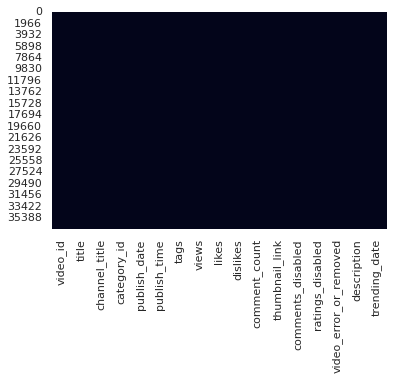

<Figure size 432x288 with 0 Axes>

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.figure()

In [9]:
# Making copy of original dataframe
backup_df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Sorting according to latest trending date while removing duplicates
df = df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
# Printing results
df[['publish_date','publish_time','trending_date']].head()
# It can be seen that latest publications and trending information is at the top now

,publish_date,publish_time,trending_date
video_id,,,
wERgpPK44w0,2018-06-10,04:29:54,2018-06-14
w8jWRfnyT4g,2018-06-13,13:48:30,2018-06-14
wc81f_X9pec,2018-06-12,12:30:03,2018-06-14
Q3L0gArhmaE,2018-06-12,18:30:01,2018-06-14
A9QZPy7AuWk,2018-06-13,13:09:23,2018-06-14


Cateogy column is showing numbers ,so  json file we need to import & map it category column 

In [10]:
with open('IN_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
  data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation'}},
  {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles'}},
  {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music'}},
  {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Pet

In [11]:
category_id = {}
with open('IN_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
df.insert(2, 'category', df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
# Printing cleaned combined dataframe
df.head(3)

,index,title,category,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_date
video_id,,,,,,,,,,,,,,,,,,
wERgpPK44w0,37351,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Entertainment,Suresh Productions,24,2018-06-10,04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...,2018-06-14
w8jWRfnyT4g,37233,Auto Scenes-Types of Customers || Mahathalli,Entertainment,Mahathalli,24,2018-06-13,13:48:30,"telugu comedy videos|""telugu funny videos""|""te...",219488,6330,214,1062,https://i.ytimg.com/vi/w8jWRfnyT4g/default.jpg,False,False,False,"Cast : Jahnavi DasettyDOP : Sekhar Boon, Seshi...",2018-06-14
wc81f_X9pec,37241,Casting Couch S3E5 Sonali Kulkarni with Amey &...,Comedy,Bharatiya Digital Party,23,2018-06-12,12:30:03,"bhartiya digital party|""bhadipa latest""|""marat...",134628,4111,165,380,https://i.ytimg.com/vi/wc81f_X9pec/default.jpg,False,False,False,Suhana Presents: Casting Couch with Amey & Nip...,2018-06-14


In [12]:
#Checking how many unique categoty is present.
df['category'].unique()

array(['Entertainment', 'Comedy', 'Music', 'News & Politics', 'Shows',
       'Education', 'People & Blogs', 'Howto & Style', 'Film & Animation',
       'Gaming', 'Science & Technology', 'Sports', 'Movies', nan,
       'Autos & Vehicles', 'Travel & Events', 'Pets & Animals'],
      dtype=object)

Ratio of like in Descending order in Bar graph for each Category

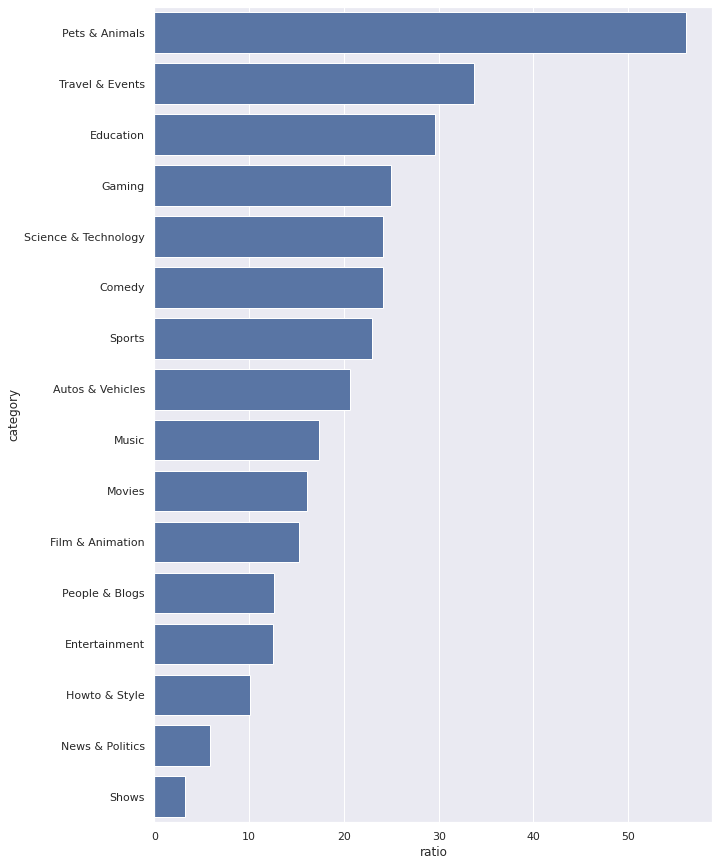

In [13]:
# calculating total likes for each category
likesdf = df.groupby('category')['likes'].agg('sum')
# calculating total dislikes for each category
dislikesdf = df.groupby('category')['dislikes'].agg('sum')
# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 
# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()
# plotting bar chart
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,label="Likes-Dislikes Ratio", color="b")

#Top 5 Trending Videos

In [14]:
temp = df
temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
temp.set_index('video_id', inplace=True)
temp = temp.head(5) # top 5 that are on trending
temp[['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,125432237,2912710
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,89930713,2606663
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,53822757,1250535
QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,45064699,1494997
rRr1qiJRsXk,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,44171797,780895


Top 5 Videos that are most liked.

In [16]:
temp = df
temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
temp.set_index('video_id', inplace=True)
temp = temp.head(5) # top 5 that are most liked
temp[['views', 'likes']]

,views,likes
video_id,,
FlsCjmMhFmw,125432237,2912710
6ZfuNTqbHE8,89930713,2606663
dfnCAmr569k,42019590,1804377
2Vv-BfVoq4g,39082222,1721384
tCXGJQYZ9JA,43738208,1658756


Category wise View & LIkes

In [17]:
temp = df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes
category,,
Entertainment,4338774381,83842160
Music,2447689100,54100101
Comedy,798797761,38804393
Film & Animation,937246273,14212361
Science & Technology,199386704,9566636


Category wise View & Likes,Comment

In [18]:
temp = df
temp = temp.groupby('category')['views','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,comment_count
category,,,
Entertainment,4338774381,83842160,8970757
Music,2447689100,54100101,3450605
Science & Technology,199386704,9566636,3381982
Comedy,798797761,38804393,3117473
Film & Animation,937246273,14212361,1183364


Wordcloud for Tags

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


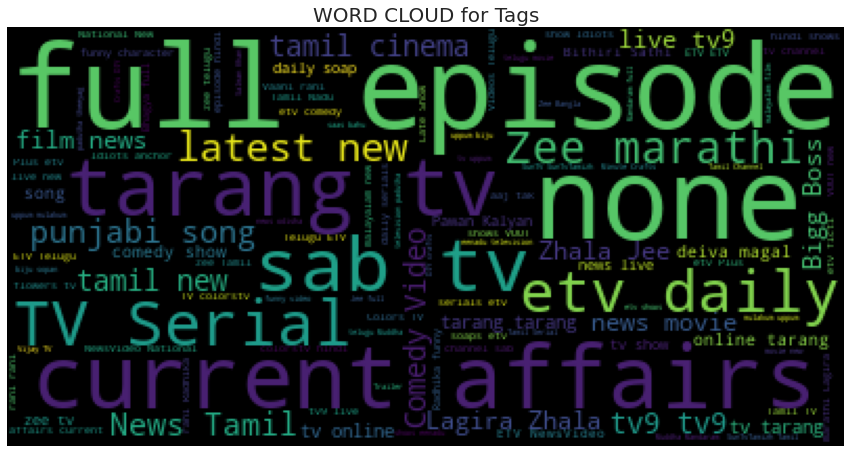

In [20]:
import nltk
nltk.download('stopwords')
from wordcloud import STOPWORDS
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
plt.figure(figsize = (15, 15))
wordcloud = WordCloud(background_color = 'black',stopwords = stop_words,max_words = 1000,max_font_size = 120,random_state = 42).generate(str(df['tags']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Tags', fontsize = 20)
plt.axis('off')
plt.show()

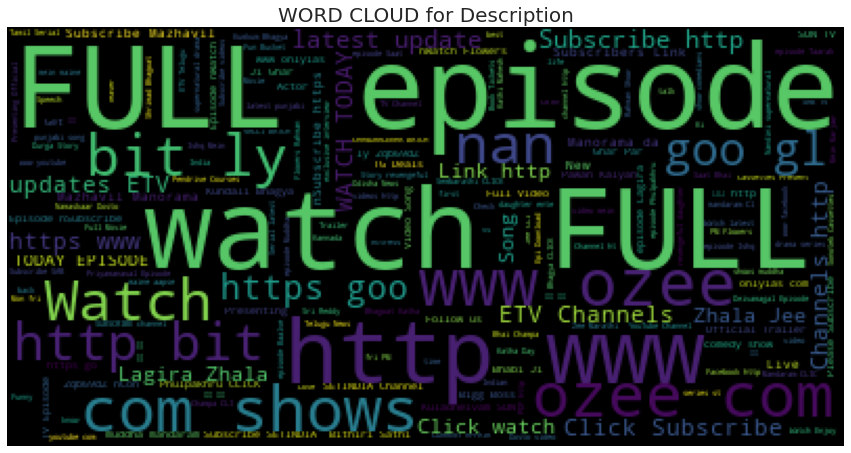

In [21]:
# For description
plt.figure(figsize = (15, 15))
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(
background_color = 'black',
stopwords = stop_words,
max_words = 1000,
max_font_size = 120,
random_state = 42
).generate(str(df['description']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Description', fontsize = 20)
plt.axis('off')
plt.show()

In [22]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = df[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.842418,0.584295,0.664996
likes,0.842418,1.000000,0.509207,0.760601
dislikes,0.584295,0.509207,1.000000,0.700620
comment_count,0.664996,0.760601,0.700620,1.000000


#Observations:
1- Entertanment Section have more View & Likes.
2- Views have High Correlation with Likes.
3- Like Ratio is Highest for Pet & Animal videos  